In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from IPython.display import display,Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset

df=pd.read_csv('Freelance Platform Projects-Regression.csv')
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,Published Travel Writer required for content c...,Writing & Translation,Entry ($),Content Writing,GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:23:01,I am looking for a published travel writer to ...,NaN,2011-06-06,Amsterdam,Netherlands,GBP,Wordpress Expert
12218,Shopify - Filtering Work (Product Selection/No...,Design,Intermediate ($$),Web Design,GBP,65.0,remote_country,GB,fixed_price,2023-01-18 19:18:48,On our website www.juicebitz.co.uk we have add...,1 day or less,2022-03-23,Filey,United Kingdom,GBP,Director
12219,Simple SQL Query,Technology & Programming,Entry ($),Data Science & Analysis,GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:18:48,I need someone to write a quick SQL query on a...,NaN,2022-03-14,London,United Kingdom,GBP,NaN
12220,"Create a Carbon, Water, Waste Calculating plat...",Design,Expert ($$$),Web Design,USD,39.0,remote,ALL,hourly,2023-01-18 19:18:47,I am seeking a full stack web developer who sp...,NaN,2013-07-21,Noida,India,USD,"Google Adwords, Pay Per Click, Google Shopping..."


In [3]:
# rows and columns from dataset
df.shape

(12222, 17)

In [4]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


In [5]:
# missing values

df.isna().sum()

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

<Axes: >

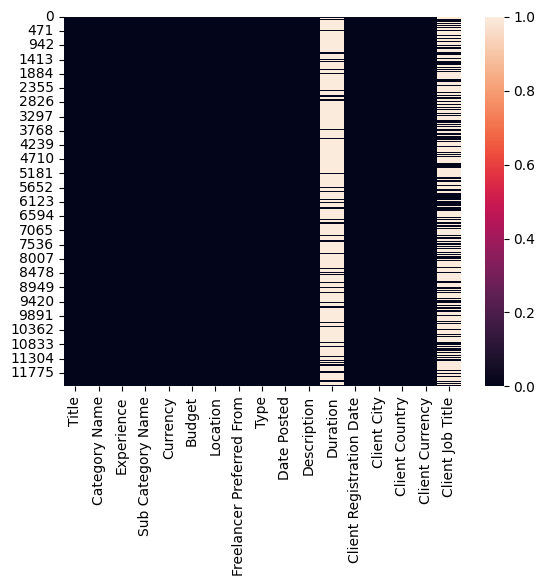

In [6]:
# visualize missing values

sns.heatmap(df.isnull())

In [7]:
df.shape[0],df.shape[1]

(12222, 17)

In [8]:
null_val_per=df.isnull().sum()/df.shape[0]*100
null_val_per

Title                         0.000000
Category Name                 0.000000
Experience                    0.000000
Sub Category Name             0.000000
Currency                      0.000000
Budget                        0.000000
Location                      0.000000
Freelancer Preferred From     0.000000
Type                          0.000000
Date Posted                   0.000000
Description                   0.000000
Duration                     86.892489
Client Registration Date      0.000000
Client City                   0.000000
Client Country                0.000000
Client Currency               0.000000
Client Job Title             62.461136
dtype: float64

In [9]:
# droping columns where missing more than 50 %

drop_col=null_val_per[null_val_per>50].keys()

In [10]:
drop_col

Index(['Duration', 'Client Job Title'], dtype='object')

In [11]:
df=df.drop(columns=drop_col)

In [12]:
df.isna().sum()

Title                        0
Category Name                0
Experience                   0
Sub Category Name            0
Currency                     0
Budget                       0
Location                     0
Freelancer Preferred From    0
Type                         0
Date Posted                  0
Description                  0
Client Registration Date     0
Client City                  0
Client Country               0
Client Currency              0
dtype: int64

<Axes: >

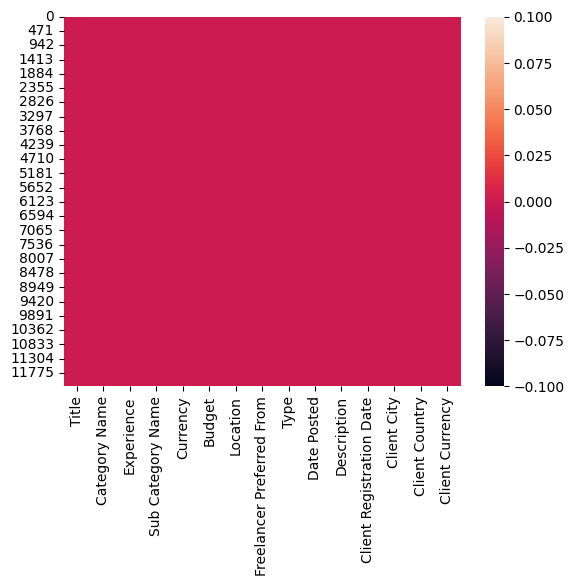

In [13]:
sns.heatmap(df.isnull())

In [14]:
# cheaking datatypes

df.dtypes

Title                         object
Category Name                 object
Experience                    object
Sub Category Name             object
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From     object
Type                          object
Date Posted                   object
Description                   object
Client Registration Date      object
Client City                   object
Client Country                object
Client Currency               object
dtype: object

In [15]:
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Date Posted', 'Description', 'Client Registration Date', 'Client City',
       'Client Country', 'Client Currency'],
      dtype='object')

In [16]:
# converting categorical into numerical datatype by label encoder

col_encode=['Title', 'Category Name',
            'Sub Category Name','Freelancer Preferred From'
            , 'Description', 'Client City',
       'Client Country']

In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in col_encode:
    df[i]=le.fit_transform(df[i])

In [18]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                    object
Sub Category Name              int32
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From      int32
Type                          object
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency               object
dtype: object

In [19]:
# convert object dtype by one hot encoding 

col_enc=['Location','Type']

In [20]:
df=pd.get_dummies(df,columns=col_enc)

In [21]:
df.shape

(12222, 18)

In [22]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                    object
Sub Category Name              int32
Currency                      object
Budget                       float64
Freelancer Preferred From      int32
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency               object
Location_onsite                uint8
Location_remote                uint8
Location_remote_country        uint8
Type_fixed_price               uint8
Type_hourly                    uint8
dtype: object

In [23]:
df[['Location_onsite','Location_remote','Type_fixed_price',
    'Type_hourly']]=df[['Location_onsite','Location_remote',
        'Type_fixed_price','Type_hourly']].astype('int32')

In [24]:
df[['Location_remote_country']]=df[['Location_remote_country']].astype('int32')

In [25]:
df['Experience'].value_counts()

Expert ($$$)         5407
Entry ($)            5318
Intermediate ($$)    1497
Name: Experience, dtype: int64

In [26]:
df['Experience']=df['Experience'].replace(
{'Entry ($)':0,
'Intermediate ($$)':1,
 'Expert ($$$)':2
 
})

In [27]:
df['Experience'].dtype

dtype('int64')

In [28]:
# feature engineering

In [29]:
df['Budget']

0           60.0
1           20.0
2           12.0
3           14.0
4        10000.0
          ...   
12217       50.0
12218       65.0
12219       50.0
12220       39.0
12221       75.0
Name: Budget, Length: 12222, dtype: float64

In [30]:
# converting budget into usd

def budget_usd(row):
    if row['Currency']=='EUR':
        return row['Budget']*1.0956
    elif row['Currency']=='GBP':
        return row['Budget']*1.28
    else:
        return row['Budget']
    

In [31]:
df['Budget']=df.apply(budget_usd,axis=1)

In [32]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country,Type_fixed_price,Type_hourly
0,969,1,0,42,EUR,65.736,1,2023-04-29 18:06:39,10434,2010-11-03,489,61,EUR,0,1,0,1,0
1,6377,7,0,45,GBP,25.600,1,2023-04-29 17:40:28,1247,2017-02-21,940,129,GBP,0,1,0,1,0
2,1108,0,0,37,GBP,15.360,1,2023-04-29 17:40:06,2179,2023-04-09,940,129,GBP,0,1,0,1,0
3,467,0,0,90,GBP,17.920,1,2023-04-29 17:32:01,2181,2023-04-09,940,129,GBP,0,1,0,1,0
4,3859,2,2,76,USD,10000.000,1,2023-04-29 17:09:36,3024,2016-07-01,1079,58,USD,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,GBP,64.000,1,2023-01-18 19:23:01,3660,2011-06-06,47,88,GBP,0,1,0,1,0
12218,8803,1,1,101,GBP,83.200,16,2023-01-18 19:18:48,8718,2022-03-23,554,129,GBP,0,0,1,1,0
12219,8927,6,0,25,GBP,64.000,1,2023-01-18 19:18:48,6547,2022-03-14,940,129,GBP,0,1,0,1,0
12220,2057,1,2,101,USD,39.000,1,2023-01-18 19:18:47,4154,2013-07-21,1135,58,USD,0,1,0,0,1


In [33]:
df['Currency']=df['Currency'].replace({'EUR':'USD',
                                       'GBP':'USD',
                                       'USD':'USD'})

In [34]:
df['Currency']=df['Currency'].replace({'USD':1})

In [35]:
df['Client Currency']=df['Client Currency'].replace({'EUR':1.09565,
                                       'GBP':1.2824,
                                       'USD':1})

In [36]:
df[['Currency','Client Currency']]

,Currency,Client Currency
0,1,1.09565
1,1,1.28240
2,1,1.28240
3,1,1.28240
4,1,1.00000
...,...,...
12217,1,1.28240
12218,1,1.28240
12219,1,1.28240
12220,1,1.00000


In [37]:
df['Date Posted']

0        2023-04-29 18:06:39
1        2023-04-29 17:40:28
2        2023-04-29 17:40:06
3        2023-04-29 17:32:01
4        2023-04-29 17:09:36
                ...         
12217    2023-01-18 19:23:01
12218    2023-01-18 19:18:48
12219    2023-01-18 19:18:48
12220    2023-01-18 19:18:47
12221    2023-01-18 19:18:47
Name: Date Posted, Length: 12222, dtype: object

In [38]:
df[['Posted_day','Posted_time']]=df['Date Posted'].str.split(' ',1,expand=True)

In [39]:
df[['Posted_day','Posted_time']]

,Posted_day,Posted_time
0,2023-04-29,18:06:39
1,2023-04-29,17:40:28
2,2023-04-29,17:40:06
3,2023-04-29,17:32:01
4,2023-04-29,17:09:36
...,...,...
12217,2023-01-18,19:23:01
12218,2023-01-18,19:18:48
12219,2023-01-18,19:18:48
12220,2023-01-18,19:18:47


In [40]:
df[['posted_year','posted_month','posted_date']]=df['Posted_day'].str.split('-',3,expand=True)

In [41]:
df[['posted_year','posted_month','posted_date']]

,posted_year,posted_month,posted_date
0,2023,04,29
1,2023,04,29
2,2023,04,29
3,2023,04,29
4,2023,04,29
...,...,...,...
12217,2023,01,18
12218,2023,01,18
12219,2023,01,18
12220,2023,01,18


In [42]:
df[['posted_year','posted_month','posted_date']]=df[['posted_year',
                                                     'posted_month',
                                                     'posted_date']].astype('int32')

In [43]:
df=df.drop(columns=['Date Posted'])

In [44]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
Posted_day                    object
Posted_time                   object
posted_year                    int32
posted_month                   int32
posted_date                    int32
dtype: object

In [45]:
df['Client Registration Date']

0        2010-11-03
1        2017-02-21
2        2023-04-09
3        2023-04-09
4        2016-07-01
            ...    
12217    2011-06-06
12218    2022-03-23
12219    2022-03-14
12220    2013-07-21
12221    2020-09-21
Name: Client Registration Date, Length: 12222, dtype: object

In [46]:
df[['client_year','client_month','client_date']]=df['Client Registration Date'].str.split('-',3,expand=True)

df[['client_year','client_month','client_date']]=df[['posted_year',
                                                     'posted_month',
                                                     'posted_date']].astype('int32')



df=df.drop(columns=['Client Registration Date'])

df


,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_fixed_price,Type_hourly,Posted_day,Posted_time,posted_year,posted_month,posted_date,client_year,client_month,client_date
0,969,1,0,42,1,65.736,1,10434,489,61,...,1,0,2023-04-29,18:06:39,2023,4,29,2023,4,29
1,6377,7,0,45,1,25.600,1,1247,940,129,...,1,0,2023-04-29,17:40:28,2023,4,29,2023,4,29
2,1108,0,0,37,1,15.360,1,2179,940,129,...,1,0,2023-04-29,17:40:06,2023,4,29,2023,4,29
3,467,0,0,90,1,17.920,1,2181,940,129,...,1,0,2023-04-29,17:32:01,2023,4,29,2023,4,29
4,3859,2,2,76,1,10000.000,1,3024,1079,58,...,1,0,2023-04-29,17:09:36,2023,4,29,2023,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,3660,47,88,...,1,0,2023-01-18,19:23:01,2023,1,18,2023,1,18
12218,8803,1,1,101,1,83.200,16,8718,554,129,...,1,0,2023-01-18,19:18:48,2023,1,18,2023,1,18
12219,8927,6,0,25,1,64.000,1,6547,940,129,...,1,0,2023-01-18,19:18:48,2023,1,18,2023,1,18
12220,2057,1,2,101,1,39.000,1,4154,1135,58,...,0,1,2023-01-18,19:18:47,2023,1,18,2023,1,18


In [47]:
df['Posted_time']

0        18:06:39
1        17:40:28
2        17:40:06
3        17:32:01
4        17:09:36
           ...   
12217    19:23:01
12218    19:18:48
12219    19:18:48
12220    19:18:47
12221    19:18:47
Name: Posted_time, Length: 12222, dtype: object

In [48]:
df[['posted_hour','posted_min','posted_sec']]=df['Posted_time'].str.split(':',3,expand=True)

df[['posted_hour','posted_min','posted_sec']]=df[['posted_hour',
                                                     'posted_min',
                                                     'posted_sec']].astype('int32')



df=df.drop(columns=['Posted_time'])

df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Posted_day,posted_year,posted_month,posted_date,client_year,client_month,client_date,posted_hour,posted_min,posted_sec
0,969,1,0,42,1,65.736,1,10434,489,61,...,2023-04-29,2023,4,29,2023,4,29,18,6,39
1,6377,7,0,45,1,25.600,1,1247,940,129,...,2023-04-29,2023,4,29,2023,4,29,17,40,28
2,1108,0,0,37,1,15.360,1,2179,940,129,...,2023-04-29,2023,4,29,2023,4,29,17,40,6
3,467,0,0,90,1,17.920,1,2181,940,129,...,2023-04-29,2023,4,29,2023,4,29,17,32,1
4,3859,2,2,76,1,10000.000,1,3024,1079,58,...,2023-04-29,2023,4,29,2023,4,29,17,9,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,3660,47,88,...,2023-01-18,2023,1,18,2023,1,18,19,23,1
12218,8803,1,1,101,1,83.200,16,8718,554,129,...,2023-01-18,2023,1,18,2023,1,18,19,18,48
12219,8927,6,0,25,1,64.000,1,6547,940,129,...,2023-01-18,2023,1,18,2023,1,18,19,18,48
12220,2057,1,2,101,1,39.000,1,4154,1135,58,...,2023-01-18,2023,1,18,2023,1,18,19,18,47


In [49]:
df=df.drop(columns='Posted_day')
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_hourly,posted_year,posted_month,posted_date,client_year,client_month,client_date,posted_hour,posted_min,posted_sec
0,969,1,0,42,1,65.736,1,10434,489,61,...,0,2023,4,29,2023,4,29,18,6,39
1,6377,7,0,45,1,25.600,1,1247,940,129,...,0,2023,4,29,2023,4,29,17,40,28
2,1108,0,0,37,1,15.360,1,2179,940,129,...,0,2023,4,29,2023,4,29,17,40,6
3,467,0,0,90,1,17.920,1,2181,940,129,...,0,2023,4,29,2023,4,29,17,32,1
4,3859,2,2,76,1,10000.000,1,3024,1079,58,...,0,2023,4,29,2023,4,29,17,9,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,3660,47,88,...,0,2023,1,18,2023,1,18,19,23,1
12218,8803,1,1,101,1,83.200,16,8718,554,129,...,0,2023,1,18,2023,1,18,19,18,48
12219,8927,6,0,25,1,64.000,1,6547,940,129,...,0,2023,1,18,2023,1,18,19,18,48
12220,2057,1,2,101,1,39.000,1,4154,1135,58,...,1,2023,1,18,2023,1,18,19,18,47


In [50]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_hourly,posted_year,posted_month,posted_date,client_year,client_month,client_date,posted_hour,posted_min,posted_sec
0,969,1,0,42,1,65.736,1,10434,489,61,...,0,2023,4,29,2023,4,29,18,6,39
1,6377,7,0,45,1,25.600,1,1247,940,129,...,0,2023,4,29,2023,4,29,17,40,28
2,1108,0,0,37,1,15.360,1,2179,940,129,...,0,2023,4,29,2023,4,29,17,40,6
3,467,0,0,90,1,17.920,1,2181,940,129,...,0,2023,4,29,2023,4,29,17,32,1
4,3859,2,2,76,1,10000.000,1,3024,1079,58,...,0,2023,4,29,2023,4,29,17,9,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,3660,47,88,...,0,2023,1,18,2023,1,18,19,23,1
12218,8803,1,1,101,1,83.200,16,8718,554,129,...,0,2023,1,18,2023,1,18,19,18,48
12219,8927,6,0,25,1,64.000,1,6547,940,129,...,0,2023,1,18,2023,1,18,19,18,48
12220,2057,1,2,101,1,39.000,1,4154,1135,58,...,1,2023,1,18,2023,1,18,19,18,47


In [51]:
df.describe()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_hourly,posted_year,posted_month,posted_date,client_year,client_month,client_date,posted_hour,posted_min,posted_sec
count,12222.000000,12222.000000,12222.000000,12222.000000,12222.0,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,...,12222.000000,12222.0,12222.000000,12222.000000,12222.0,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000
mean,5806.995173,3.712813,1.007282,56.839552,1.0,272.077271,2.186876,5958.065538,871.258714,113.476681,...,0.146048,2023.0,2.696367,16.161676,2023.0,2.696367,16.161676,11.636639,29.628702,29.392653
std,3340.786412,2.820344,0.936768,32.627551,0.0,2345.979319,5.015981,3446.774106,456.183611,32.275724,...,0.353169,0.0,1.003399,8.698321,0.0,1.003399,8.698321,5.211910,18.065553,17.294521
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2023.0,1.000000,1.000000,2023.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2918.250000,1.000000,0.000000,30.000000,1.0,38.400000,1.000000,2965.250000,487.250000,128.000000,...,0.000000,2023.0,2.000000,9.000000,2023.0,2.000000,9.000000,9.000000,13.000000,14.000000
50%,5842.500000,3.000000,1.000000,52.000000,1.0,96.000000,1.000000,5960.500000,940.000000,129.000000,...,0.000000,2023.0,3.000000,17.000000,2023.0,3.000000,17.000000,12.000000,30.000000,29.000000
75%,8707.750000,6.000000,2.000000,92.000000,1.0,192.000000,1.000000,8938.750000,1139.000000,129.000000,...,0.000000,2023.0,4.000000,24.000000,2023.0,4.000000,24.000000,16.000000,46.000000,44.000000
max,11584.000000,8.000000,2.000000,106.000000,1.0,127998.720000,41.000000,11924.000000,1807.000000,135.000000,...,1.000000,2023.0,4.000000,31.000000,2023.0,4.000000,31.000000,23.000000,59.000000,59.000000


In [52]:
from scipy.stats import skew

In [53]:
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'posted_month', 'posted_date',
       'client_year', 'client_month', 'client_date', 'posted_hour',
       'posted_min', 'posted_sec'],
      dtype='object')

In [54]:
num_col=df[['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'posted_month', 'posted_date',
       'client_year', 'client_month', 'client_date', 'posted_hour',
       'posted_min', 'posted_sec']]

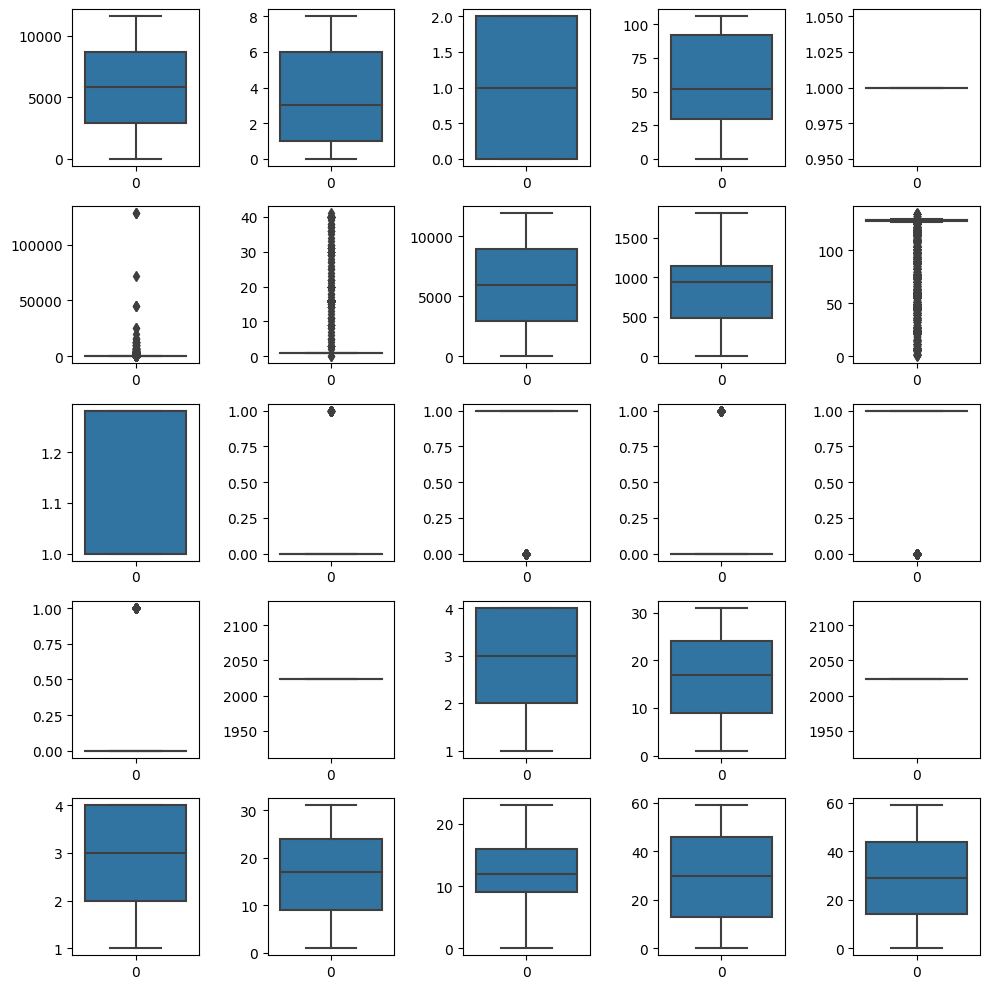

In [55]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(num_col):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(num_col[col])

plt.tight_layout()
plt.show()

<Axes: >

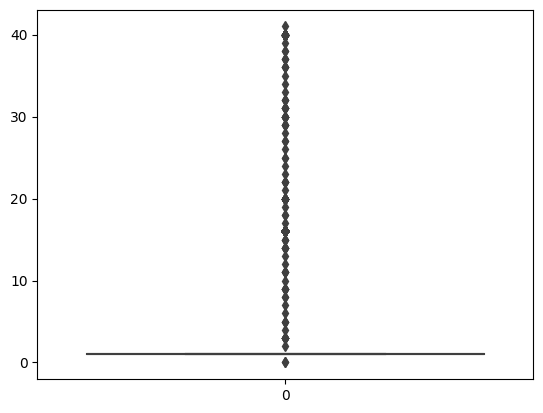

In [56]:
sns.boxplot(df['Freelancer Preferred From'])

In [57]:
# handling outliers - skiped 

#frellancer preffered from
#client country
#budget


posted_sec
-0.009026543535716235
posted_sec
0.13667421107983443
posted_sec
-0.014462463349103371
posted_sec
-0.018928584486655
posted_sec
nan
posted_sec
44.18062965631726
posted_sec
5.042642835420588
posted_sec
-0.0001446030632413165
posted_sec
0.037911936508722724
posted_sec
-1.9572602850079996
posted_sec
-0.6898270113717148
posted_sec
13.19606427663473
posted_sec
-3.5384354210719717
posted_sec
3.740422495926208
posted_sec
-2.0045161462235868
posted_sec
2.0045161462235868
posted_sec
nan
posted_sec
-0.14409900661337421
posted_sec
-0.10148836604122241
posted_sec
nan
posted_sec
-0.14409900661337421
posted_sec
-0.10148836604122241
posted_sec
-0.3848813346979864
posted_sec
-0.01718973566521674
posted_sec
0.012792668369375561


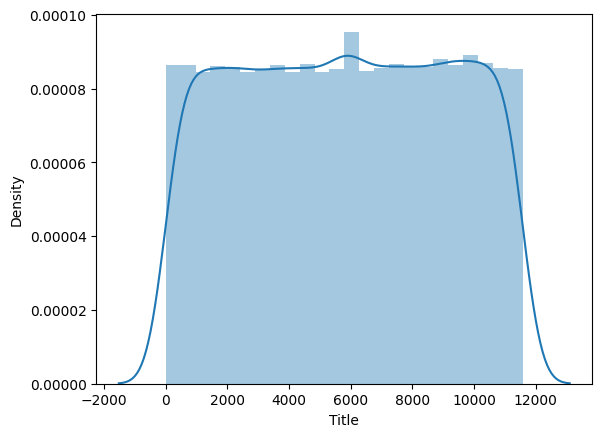

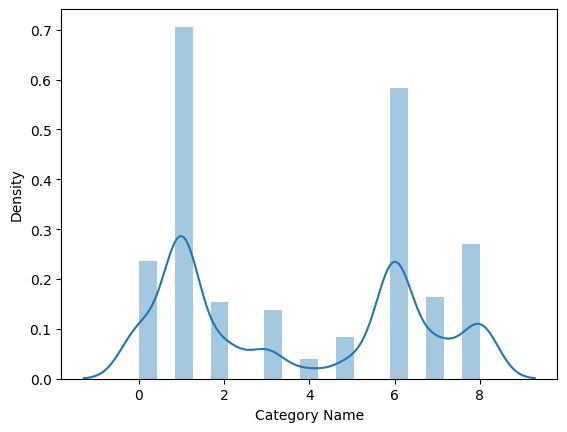

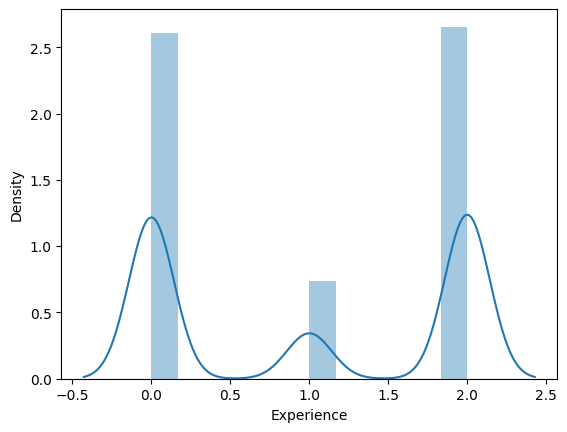

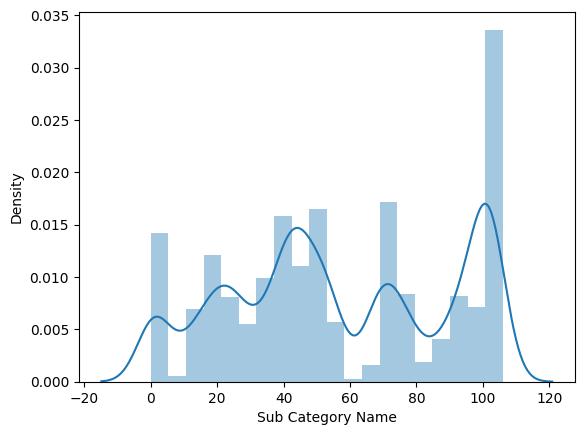

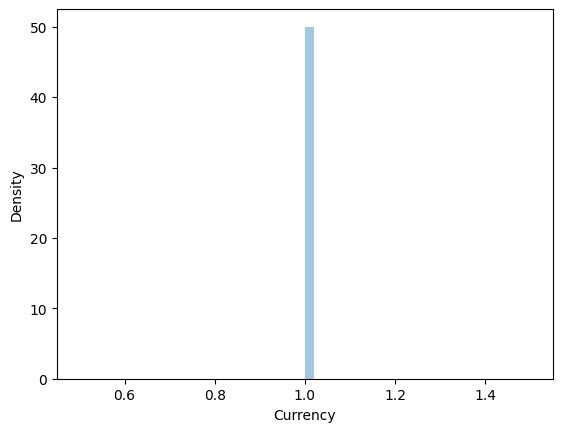

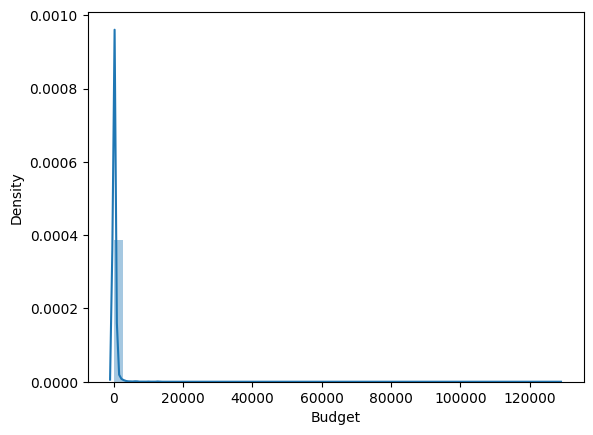

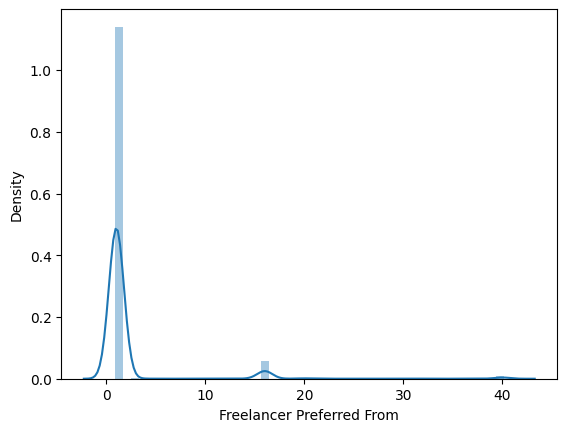

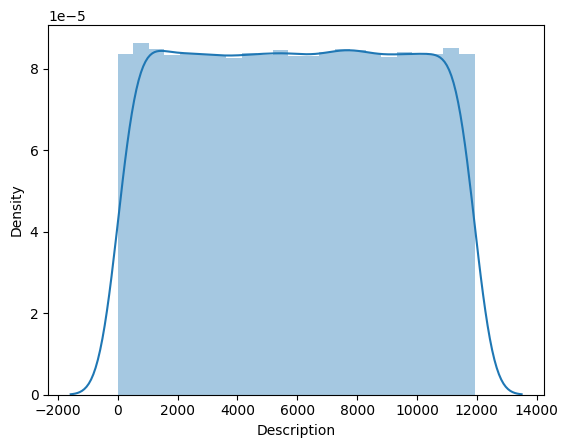

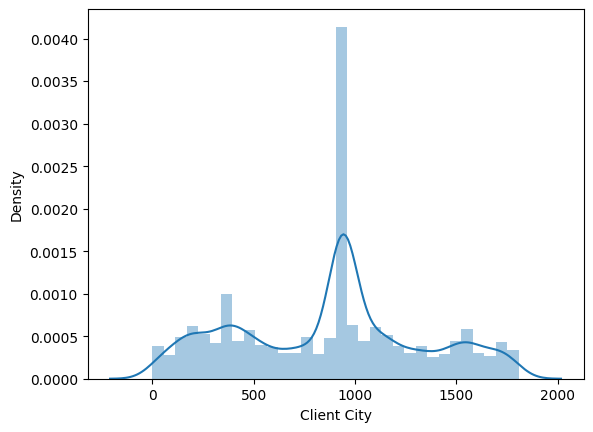

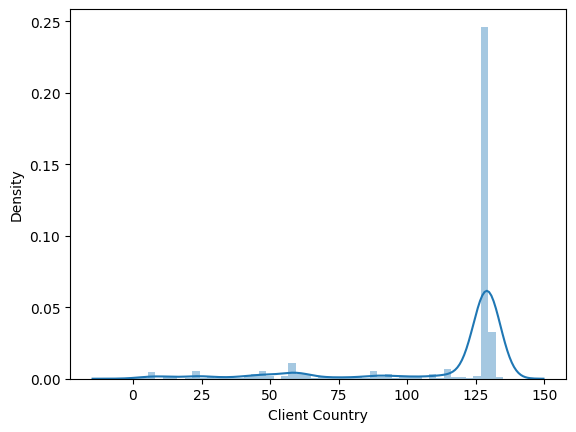

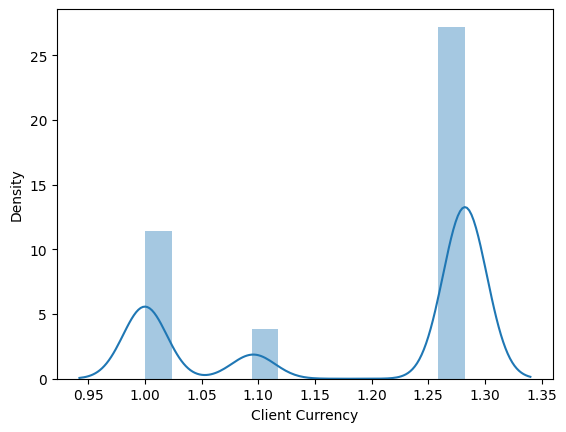

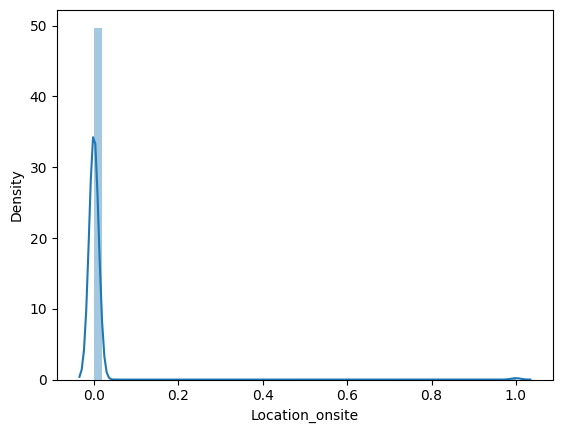

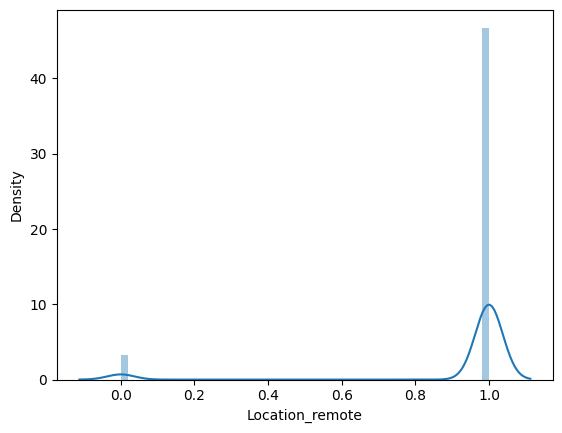

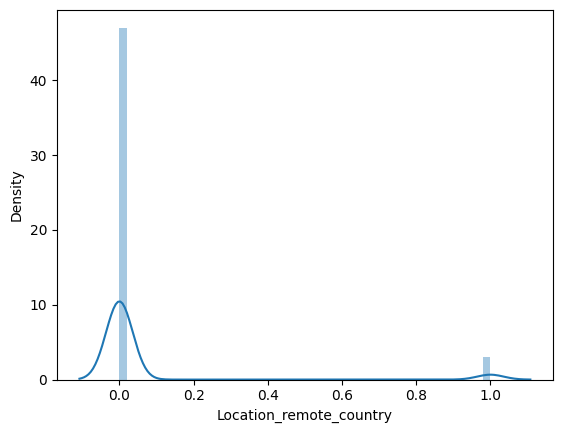

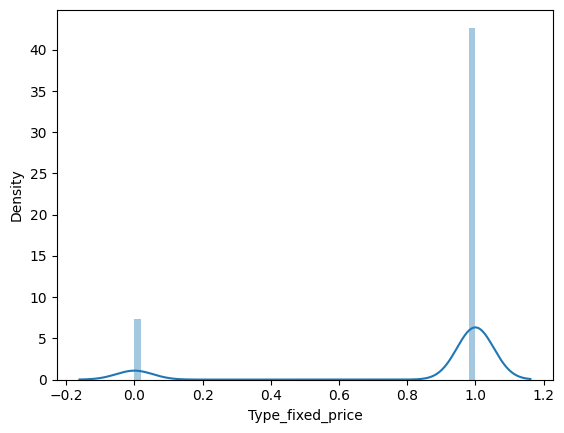

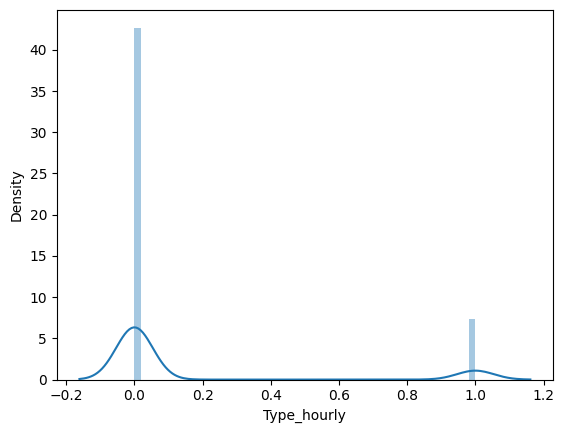

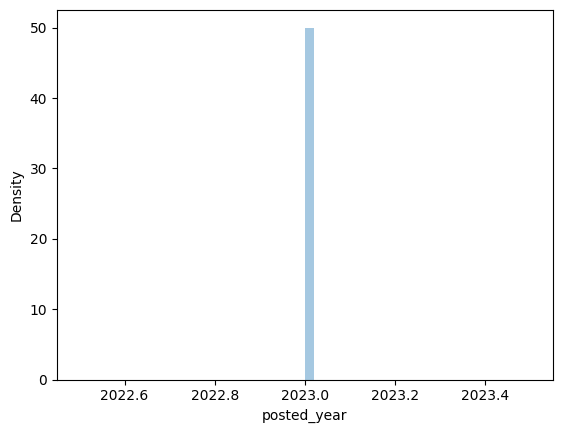

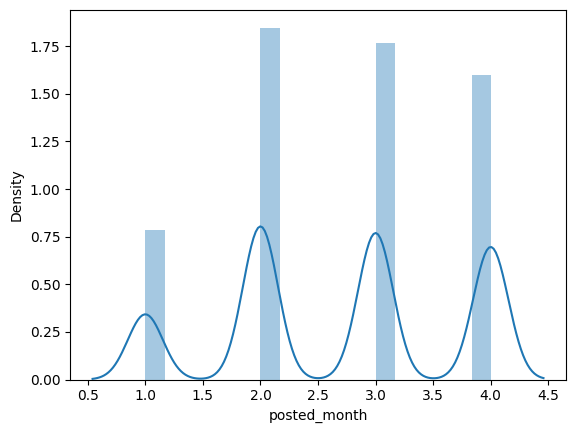

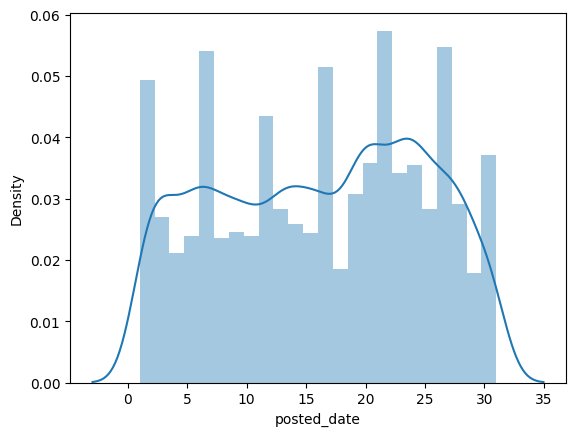

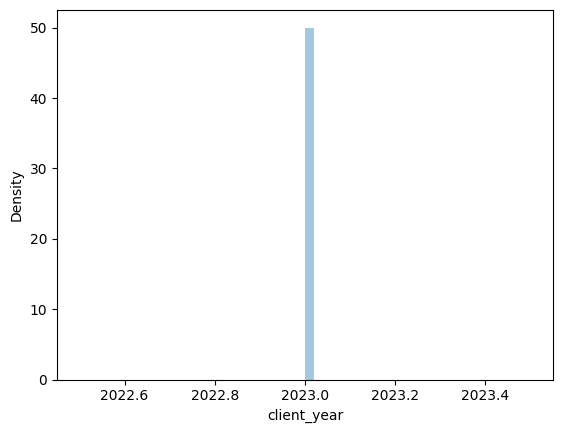

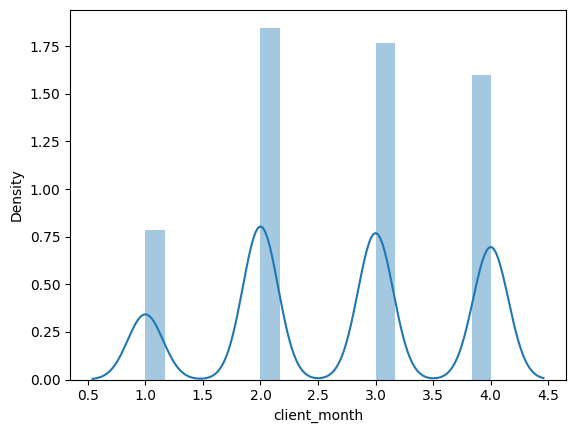

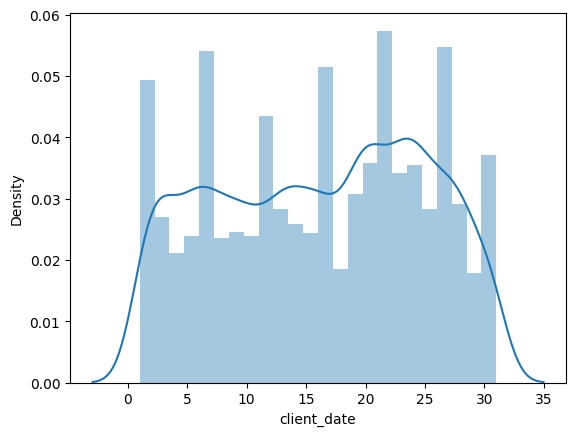

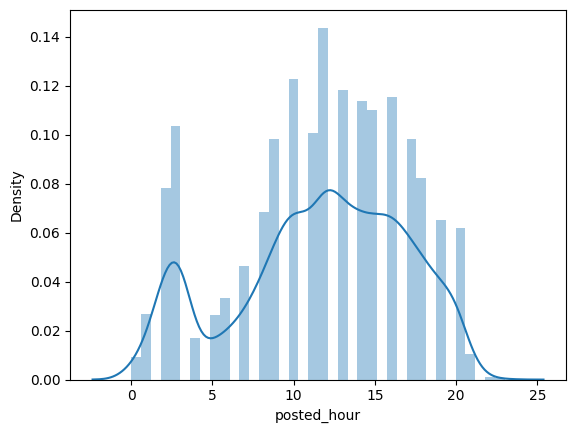

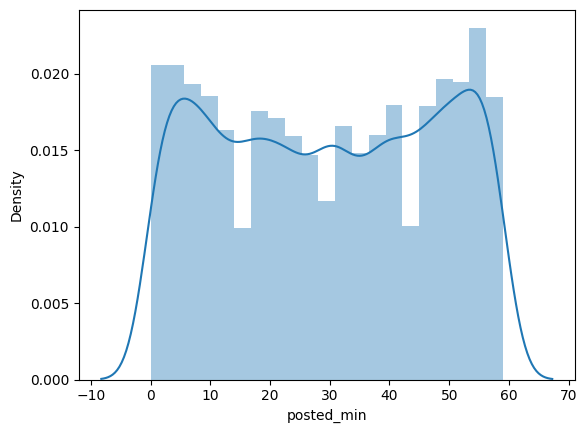

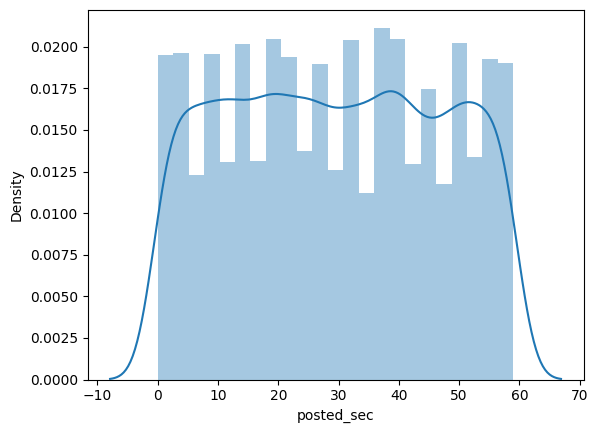

In [58]:
# finding outliers using skewness

for i in num_col:
    print(col)
    print(skew(num_col[i]))
    
    plt.figure()
    sns.distplot(num_col[i])

<Axes: >

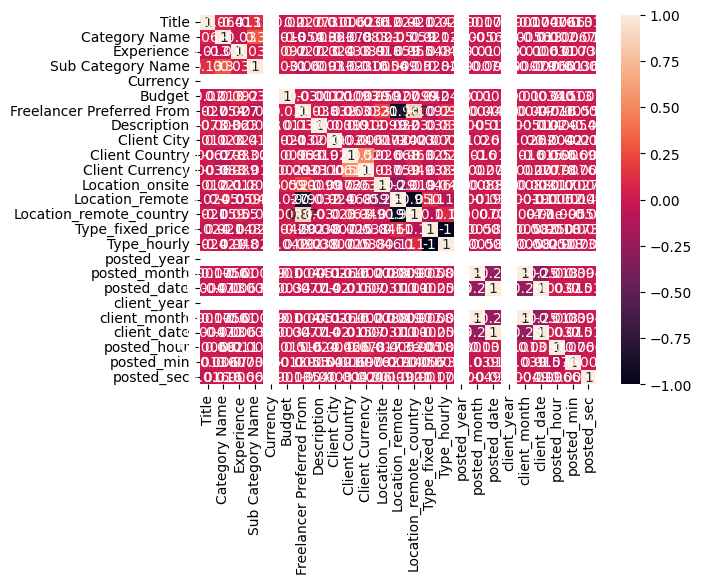

In [59]:
sns.heatmap(num_col.corr(),annot=True)

# Scaling the dataset

In [60]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

for i in df:
    ms=MinMaxScaler()
    df[i]=ms.fit_transform(df[[i]])

In [61]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_hourly,posted_year,posted_month,posted_date,client_year,client_month,client_date,posted_hour,posted_min,posted_sec
0,0.083650,0.125,0.0,0.396226,0.0,0.000514,0.024390,0.875042,0.270614,0.451852,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.782609,0.101695,0.661017
1,0.550501,0.875,0.0,0.424528,0.0,0.000200,0.024390,0.104579,0.520199,0.955556,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.739130,0.677966,0.474576
2,0.095649,0.000,0.0,0.349057,0.0,0.000120,0.024390,0.182741,0.520199,0.955556,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.739130,0.677966,0.101695
3,0.040314,0.000,0.0,0.849057,0.0,0.000140,0.024390,0.182908,0.520199,0.955556,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.739130,0.542373,0.016949
4,0.333132,0.250,1.0,0.716981,0.0,0.078126,0.024390,0.253606,0.597122,0.429630,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.739130,0.152542,0.610169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,0.686982,1.000,0.0,0.198113,0.0,0.000500,0.024390,0.306944,0.026010,0.651852,...,0.0,0.0,0.0,0.566667,0.0,0.0,0.566667,0.826087,0.389831,0.016949
12218,0.759927,0.125,0.5,0.952830,0.0,0.000650,0.390244,0.731130,0.306586,0.955556,...,0.0,0.0,0.0,0.566667,0.0,0.0,0.566667,0.826087,0.305085,0.813559
12219,0.770632,0.750,0.0,0.235849,0.0,0.000500,0.024390,0.549061,0.520199,0.955556,...,0.0,0.0,0.0,0.566667,0.0,0.0,0.566667,0.826087,0.305085,0.813559
12220,0.177573,0.125,1.0,0.952830,0.0,0.000305,0.024390,0.348373,0.628113,0.429630,...,1.0,0.0,0.0,0.566667,0.0,0.0,0.566667,0.826087,0.305085,0.796610


In [62]:
df.dtypes

Title                        float64
Category Name                float64
Experience                   float64
Sub Category Name            float64
Currency                     float64
Budget                       float64
Freelancer Preferred From    float64
Description                  float64
Client City                  float64
Client Country               float64
Client Currency              float64
Location_onsite              float64
Location_remote              float64
Location_remote_country      float64
Type_fixed_price             float64
Type_hourly                  float64
posted_year                  float64
posted_month                 float64
posted_date                  float64
client_year                  float64
client_month                 float64
client_date                  float64
posted_hour                  float64
posted_min                   float64
posted_sec                   float64
dtype: object

# Model Training and model evaluation

In [63]:
y=df['Budget']
x=df.drop(columns=['Budget'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               train_size=0.8,
                                              random_state=3)

In [64]:
x

,Title,Category Name,Experience,Sub Category Name,Currency,Freelancer Preferred From,Description,Client City,Client Country,Client Currency,...,Type_hourly,posted_year,posted_month,posted_date,client_year,client_month,client_date,posted_hour,posted_min,posted_sec
0,0.083650,0.125,0.0,0.396226,0.0,0.024390,0.875042,0.270614,0.451852,0.338704,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.782609,0.101695,0.661017
1,0.550501,0.875,0.0,0.424528,0.0,0.024390,0.104579,0.520199,0.955556,1.000000,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.739130,0.677966,0.474576
2,0.095649,0.000,0.0,0.349057,0.0,0.024390,0.182741,0.520199,0.955556,1.000000,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.739130,0.677966,0.101695
3,0.040314,0.000,0.0,0.849057,0.0,0.024390,0.182908,0.520199,0.955556,1.000000,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.739130,0.542373,0.016949
4,0.333132,0.250,1.0,0.716981,0.0,0.024390,0.253606,0.597122,0.429630,0.000000,...,0.0,0.0,1.0,0.933333,0.0,1.0,0.933333,0.739130,0.152542,0.610169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,0.686982,1.000,0.0,0.198113,0.0,0.024390,0.306944,0.026010,0.651852,1.000000,...,0.0,0.0,0.0,0.566667,0.0,0.0,0.566667,0.826087,0.389831,0.016949
12218,0.759927,0.125,0.5,0.952830,0.0,0.390244,0.731130,0.306586,0.955556,1.000000,...,0.0,0.0,0.0,0.566667,0.0,0.0,0.566667,0.826087,0.305085,0.813559
12219,0.770632,0.750,0.0,0.235849,0.0,0.024390,0.549061,0.520199,0.955556,1.000000,...,0.0,0.0,0.0,0.566667,0.0,0.0,0.566667,0.826087,0.305085,0.813559
12220,0.177573,0.125,1.0,0.952830,0.0,0.024390,0.348373,0.628113,0.429630,0.000000,...,1.0,0.0,0.0,0.566667,0.0,0.0,0.566667,0.826087,0.305085,0.796610


In [65]:
y

0        0.000514
1        0.000200
2        0.000120
3        0.000140
4        0.078126
           ...   
12217    0.000500
12218    0.000650
12219    0.000500
12220    0.000305
12221    0.000750
Name: Budget, Length: 12222, dtype: float64

In [66]:
x_train.shape,x_test.shape




((9777, 24), (2445, 24))

In [67]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 10.9 MB/s eta 0:00:00


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor()

# Train the model
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print("Random Forest Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

print()
print('Irregular results due to skiped outliers handling')

Random Forest Regression Metrics:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): -0.25

Irregular results due to skiped outliers handling


# Random forest model interpretablity

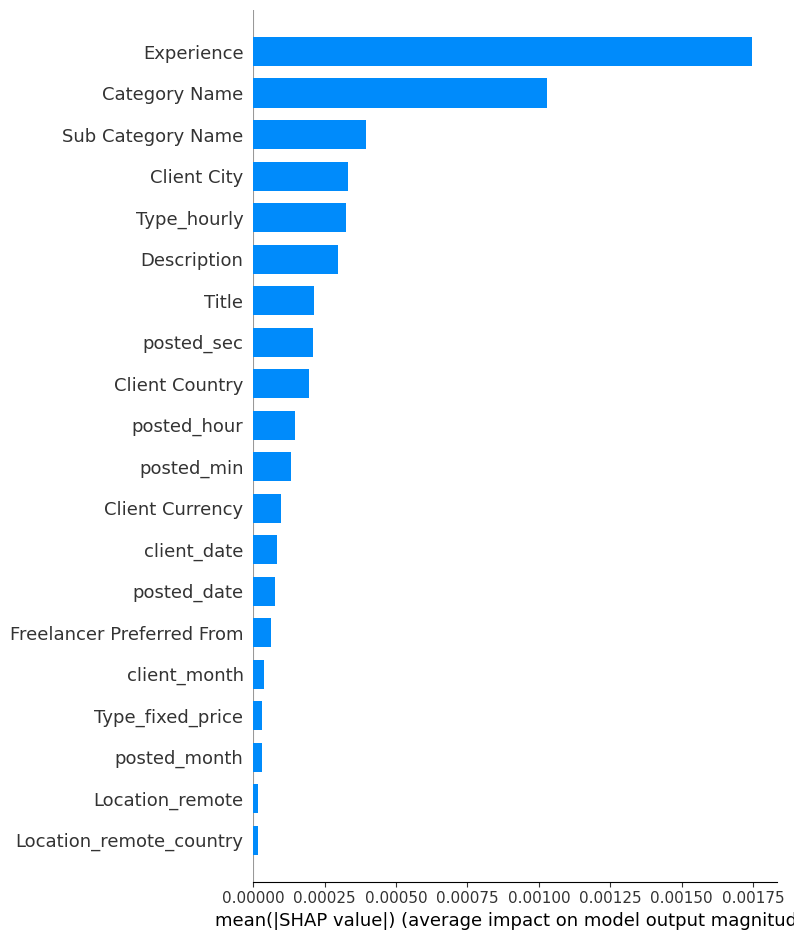

In [71]:
import shap

# Create an explainer object using the trained Random Forest model
explainer = shap.Explainer(rf_regressor, x_train[:10])

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test[:10])

# Generate a summary plot
shap.summary_plot(shap_values, x_test[:10], plot_type='bar')

# Show the plot
plt.show()


# Prediction using random forest regression model

In [79]:
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'posted_month', 'posted_date',
       'client_year', 'client_month', 'client_date', 'posted_hour',
       'posted_min', 'posted_sec'],
      dtype='object')

In [ ]:
# Define input data
input_data = {
    
    input('What is the title of the project: '),
    input('Enter the category name: '),
    float(input('Enter the experience required(entry=1, intermed=2,expert=3): ')),
    input('Enter the sub-category name: '),
    float(input('Enter the currency( put 1): ')),
    
    input('Enter the preferred location of the freelancer: '),
    input('Enter the project description: '),
    input('Enter the client city: '),
    input('Enter the client country: '),
    float(input('Enter the client currency(put 1): ')),
    float(input('Is onsite location required (yes-1/no-0): ')),
    float(input('Is remote location allowed (yes-1/no-0): ')),
    float(input('Enter the remote location country(yes-1/no-0): ')),
    float(input('Is the project fixed price yes-1/no-0): ')),
    float(input('Is the project hourly based (yes-1/no-0): ')),
    float(input('Enter the year of posting: ')),
    float(input('Enter the month of posting: ')),
    float(input('Enter the date of posting: ')),
    float(input('Enter the client\'s year of registration: ')),
    float(input('Enter the client\'s month of registration: ')),
    float(input('Enter the client\'s date of registration: ')),
    float(input('Enter the hour of posting: ')),
    float(input('Enter the minute of posting: ')),
    float(input('Enter the second of posting: '))
}




le=LabelEncoder()

input_data_encode=list(input_data)

input_data_encode[0]=le.fit_transform([input_data[0]])[0]
input_data_encode[1]=le.fit_transform([input_data[1]])[0]
input_data_encode[2]=le.fit_transform([input_data[2]])[0]
input_data_encode[3]=le.fit_transform([input_data[3]])[0]
input_data_encode[4]=le.fit_transform([input_data[4]])[0]
input_data_encode[5]=le.fit_transform([input_data[5]])[0]
input_data_encode[6]=le.fit_transform([input_data[6]])[0]
input_data_encode[7]=le.fit_transform([input_data[7]])[0]
input_data_encode[8]=le.fit_transform([input_data[8]])[0]

inp_arr=np.asarray(input_data_encode)

input_data_reshaped=inp_arr.reshape(1,-1)


pred=rf_regressor.predict(input_data_reshaped)
print('budget of given project is:',pred)


In [87]:
print('**********************')

**********************
